# Лабораторна робота 4

### Завдання

#### Частина 1: Застосування лінійної регресії для прогнозування ціни на будинок

Розробити модель лінійної регресії для прогнозування ціни на будинок на основі цих атрибутів.

1. Завантажте файл Housing.csv. Виведіть перші 5 рядків. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Housing.csv", encoding='latin1')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


2. Зробіть новий датасет, який містить тільки ці стовпчики. 
columns = ['price', 'area', 'bedrooms', 'bathrooms'] 

In [2]:
columns = ['price', 'area', 'bedrooms', 'bathrooms']
data = data[columns]

data

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


3. Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних. 
Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити тип даних на float, потім на середнє значення за стовпчиком. 

In [3]:
data_miss = data.isna().sum()/len(data)*100

print("Кількість пропускім у кожному із стовпців:\n", data_miss)

Кількість пропускім у кожному із стовпців:
 price        0.0
area         0.0
bedrooms     0.0
bathrooms    0.0
dtype: float64


4. Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність. Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення - близьким до 1. 

In [4]:
scaler = StandardScaler()
data[['area', 'bedrooms', 'bathrooms']] = scaler.fit_transform(data[['area', 'bedrooms', 'bathrooms']])

data

,price,area,bedrooms,bathrooms
0,13300000,1.046726,1.403419,1.421812
1,12250000,1.757010,1.403419,5.405809
2,12250000,2.218232,0.047278,1.421812
3,12215000,1.083624,1.403419,1.421812
4,11410000,1.046726,1.403419,-0.570187
...,...,...,...,...
540,1820000,-0.991879,-1.308863,-0.570187
541,1767150,-1.268613,0.047278,-0.570187
542,1750000,-0.705921,-1.308863,-0.570187
543,1750000,-1.033389,0.047278,-0.570187


5. Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.
6. Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).

In [5]:
x = data[['area', 'bedrooms', 'bathrooms']].values
y = data['price'].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=40)

7. Побудуйте модель лінійної регресії та навчіть її на навчальних даних. 

In [6]:
model_lin = LinearRegression()
model_lin.fit(train_x, train_y)

LinearRegression()

8. Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка та коефіцієнт детермінації. Потім застосуйте  крос-валідацію для підвищення якості моделі. Порівняйте результати (без крос-валідації і з крос-валідацією). 
9. Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних. 

In [7]:
predict = model_lin.predict(test_x)

rmse = np.sqrt(mean_squared_error(test_y, predict))
r2 = r2_score(test_y, predict)

cv_rmse = np.sqrt(-cross_val_score(model_lin, x, y, scoring='neg_mean_squared_error', cv=8))
cv_r2 = cross_val_score(model_lin, x, y, cv=8)

print("Середньоквадратична помилка:", rmse)
print("Коефіцієнт детермінації:", r2)

print ("Середньоквадратична помилка з кросс-валідацією:", np.mean(cv_rmse))
print ("Коефіцієнт детермінації з кросс-валідацією:", np.mean(cv_r2))

Середньоквадратична помилка: 1512986.9059999262
Коефіцієнт детермінації: 0.4642152184629369
Середньоквадратична помилка з кросс-валідацією: 1431206.59533937
Коефіцієнт детермінації з кросс-валідацією: -34.25728450499558


#### Частина 2: Знайдіть параметри аналітичним рішенням

10. Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії. 

In [8]:
analytical_solution = np.hstack([np.ones((train_x.shape[0], 1)), train_x])
coef_of_interception = np.linalg.inv(analytical_solution.T.dot(analytical_solution)).dot(analytical_solution.T).dot(train_y)
analytical_interception = coef_of_interception[0]
coef_for_attributes = coef_of_interception[1:]

print("Аналітично визначені коефіцієнти лінійної регресії:")
print("Interception:", analytical_interception.round(5))
print("Coefficients for attributes: ", coef_for_attributes.round(5))

Аналітично визначені коефіцієнти лінійної регресії:
Interception: 4720395.64946
Coefficients for attributes:  [717203.96319 291683.7796  702606.38517]


#### Частина 3: Візуалізація результатів та порівняння 

11. Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю. 

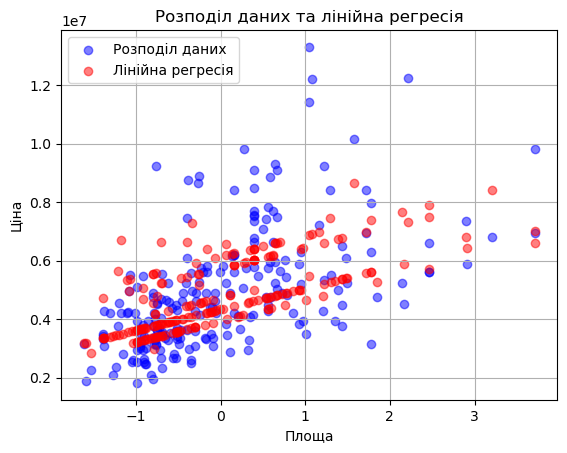

In [9]:
plt.scatter(test_x[:, 0], test_y, color='blue', alpha=0.5, label='Розподіл даних')
plt.scatter(test_x[:, 0], predict, color='red', alpha=0.5, label='Лінійна регресія')
plt.xlabel('Площа')
plt.ylabel('Ціна')
plt.title('Розподіл даних та лінійна регресія')

plt.grid()
plt.legend()
plt.show()

12. Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони. 

In [10]:
print("Coefficients: ", model_lin.coef_.round(5))
print("Interception: ", model_lin.intercept_.round(5))

Coefficients:  [717203.96319 291683.7796  702606.38517]
Interception:  4720395.64946


13. Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів та порівняння з аналітичним рішенням. 
- Лінійна регресія виявилася ефективною для прогнозування цін на будинок з використанням вказаних атрибутів. Отримані чисельні та аналітичні коефіцієнти близькі, що свідчить про добру апроксимацію моделі до даних.


#### Висновки: У ході цієї практичної роботи я освоїв процеси роботи з даними, від розділення даних до побудови та оцінки моделі лінійної регресії. Також вивчив методи вибору ознак, навчання моделі, візуалізацію результатів та порівняння їх з аналітичним рішенням..